In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
from sklearn.grid_search import GridSearchCV
import numpy as np
from scipy import io
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from utils import model_selection
from collections import defaultdict
from sklearn.metrics import mutual_info_score, accuracy_score
from tqdm import tqdm

sns.set_style('ticks')
sns.set_context('notebook',font_scale=1.3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### a) - c) model selection and mutual information using shortcuts of sklearn

In [14]:
params = dict(
            C=10.**np.arange(-5.,1.5, .5), 
            penalty=['l1','l2']
        )
results = defaultdict(list)

for i in tqdm(range(25)):
    dat = io.loadmat('/data/task03_{:02d}.mat'.format(i+1))
    X, y, Xtest, ytest = dat['X'], dat['Y'].ravel(), dat['Xval'], dat['Yval'].ravel()
   
    model = LogisticRegression(C=1.,penalty='l2')
    best = model_selection(model, X, y, params, cv=10,  scoring='accuracy', n_jobs=10)
    yhat = best.predict(Xtest)
    results['accuracy'].append(accuracy_score(ytest, yhat))
    results['mutual information [bits]'].append(mutual_info_score(ytest, yhat)/np.log(2.))
bayes_err = dat['bayes_err'].squeeze()
    

100%|██████████| 25/25 [00:09<00:00,  2.55it/s]


### d) plot Bayes error against mutual information and classification accuracy

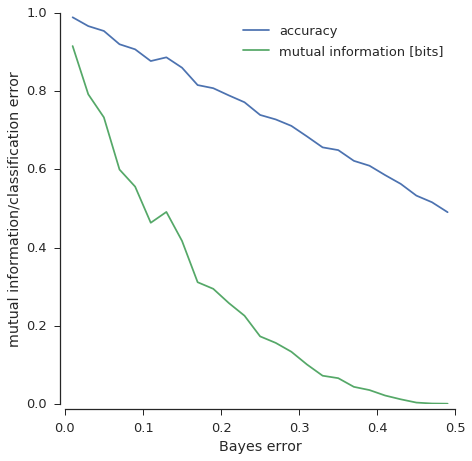

In [15]:
with sns.axes_style('ticks'):
    fig, ax = plt.subplots(figsize=(7,7))
for k, v in results.items():
    ax.plot(bayes_err, v, label=k)
ax.legend()
ax.set_xlabel('Bayes error')
ax.set_ylabel('mutual information/classification error')
sns.despine(fig, offset=5, trim=True)